# Classification on COST_BURDALL
A more tidy notebook showing results from classication models

In [1]:
import sys
sys.path.append("../") 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from scripts.utilities import *
import numpy as np

pd.options.display.max_rows = 200
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data_sets/df_cleaned.csv')
df = df.drop(columns =  ['Unnamed: 0'])

alt.Chart(df).mark_bar().encode(
    alt.X("COST_BURDALL:N", bin=False),
    y='count()'
)

alt.Chart(...)

In [3]:
c1 = alt.Chart(df).mark_bar().encode(
    x = 'GRPIP:Q',
    y = 'count()',
    color = 'COST_BURDALL:N'
)

c2 = alt.Chart(df).mark_circle().encode(
    x = 'RNTP:Q',
    y = 'HINCP:Q',
    color = 'COST_BURDALL:N'
)

c1|c2

alt.HConcatChart(...)

In [4]:
#drop variables correlated with COST_BURDALL
df = df.drop(columns = ['GRPIP', 'HINCP', 'RNTP'])

In [5]:
from pycaret.classification import *

In [6]:
clf = setup(data = df, target = 'COST_BURDALL', normalize = True, remove_outliers = True, session_id = 27)

2022-04-27 23:03:12.152 INFO    logs: create_model_container: 0
2022-04-27 23:03:12.152 INFO    logs: master_model_container: 0
2022-04-27 23:03:12.153 INFO    logs: display_container: 1
2022-04-27 23:03:12.159 INFO    logs: Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='COST_BURDALL',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                 Outlier

### Logistic Regression

In [7]:
lr = create_model('lr')

2022-04-27 23:03:15.174 INFO    logs: create_model_container: 1
2022-04-27 23:03:15.175 INFO    logs: master_model_container: 1
2022-04-27 23:03:15.175 INFO    logs: display_container: 2
2022-04-27 23:03:15.176 INFO    logs: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=27, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
2022-04-27 23:03:15.177 INFO    logs: create_model() succesfully completed......................................


In [8]:
#plot_model(lr, plot = 'rfe')

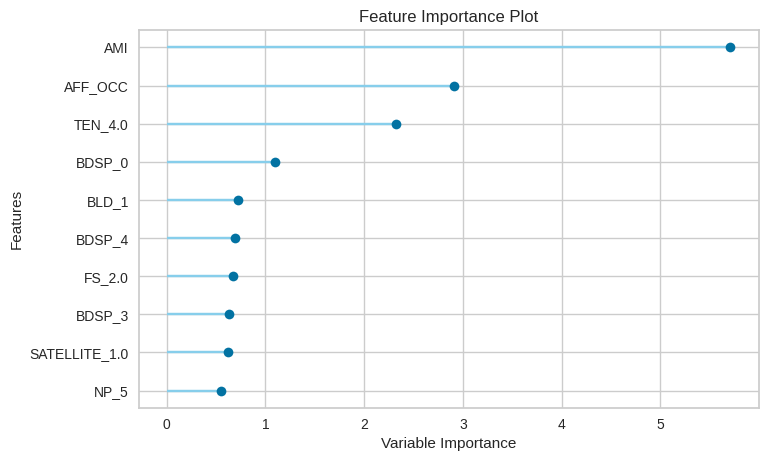

2022-04-27 23:03:15.481 INFO    logs: Visual Rendered Successfully
2022-04-27 23:03:15.560 INFO    logs: plot_model() succesfully completed......................................


In [9]:
plot_model(lr, plot = 'feature')

In [10]:
c1 = alt.Chart(df).mark_bar().encode(
    alt.X("AMI:O", bin=False),
    y='count()',
    color = 'COST_BURDALL:N'
)

c2 = alt.Chart(df).mark_bar().encode(
    alt.X("AFF_OCC:O", bin=False),
    y='count()',
    color = 'COST_BURDALL:N'
)

c3 = alt.Chart(df).mark_circle().encode(
    x = 'AMI:O',
    y = 'AFF_OCC:O',
    color = 'COST_BURDALL:N'
)
    
(c1|c2|c3).properties(title = 'Multi-Collinearity on COST_BURDALL')

alt.HConcatChart(...)

In [11]:
df = df.drop(columns = ['AMI', 'AFF_OCC'])

In [12]:
clf2 = setup(
    data = df, 
    target = 'COST_BURDALL', 
    normalize = True, 
    remove_outliers = True, 
    fix_imbalance = True,
    use_gpu = True, 
    session_id = 27, 
)

2022-04-27 23:03:19.840 INFO    logs: create_model_container: 0
2022-04-27 23:03:19.841 INFO    logs: master_model_container: 0
2022-04-27 23:03:19.841 INFO    logs: display_container: 1
2022-04-27 23:03:19.846 INFO    logs: Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='COST_BURDALL',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                 Outlier

In [13]:
lr = create_model('lr')

2022-04-27 23:03:21.379 INFO    logs: create_model_container: 1
2022-04-27 23:03:21.380 INFO    logs: master_model_container: 1
2022-04-27 23:03:21.381 INFO    logs: display_container: 2
2022-04-27 23:03:21.381 INFO    logs: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=27, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
2022-04-27 23:03:21.382 INFO    logs: create_model() succesfully completed......................................


In [14]:
get_values('BROADBND')

('Cellular data plan for a smartphone or other mobile device',
   Value                                     Record Type
 0     b  N/A (GQ/vacant/no paid access to the internet)
 1     1                                             Yes
 2     2                                              No)

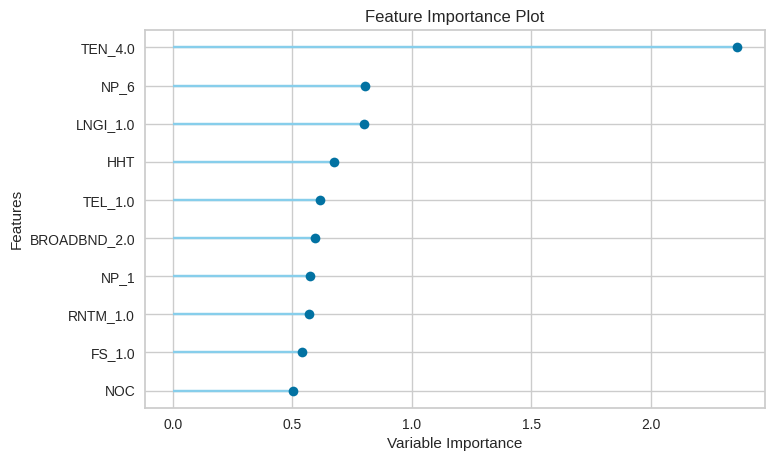

2022-04-27 23:03:21.669 INFO    logs: Visual Rendered Successfully
2022-04-27 23:03:21.744 INFO    logs: plot_model() succesfully completed......................................


In [15]:
plot_model(lr, plot='feature')

In [16]:
dt = create_model('dt')

2022-04-27 23:03:22.308 INFO    logs: create_model_container: 2
2022-04-27 23:03:22.309 INFO    logs: master_model_container: 2
2022-04-27 23:03:22.309 INFO    logs: display_container: 3
2022-04-27 23:03:22.310 INFO    logs: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=27, splitter='best')
2022-04-27 23:03:22.310 INFO    logs: create_model() succesfully completed......................................


In [17]:
tuned_dt = tune_model(dt)

2022-04-27 23:03:24.701 INFO    logs: create_model_container: 3
2022-04-27 23:03:24.701 INFO    logs: master_model_container: 3
2022-04-27 23:03:24.702 INFO    logs: display_container: 4
2022-04-27 23:03:24.703 INFO    logs: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=27, splitter='best')
2022-04-27 23:03:24.703 INFO    logs: tune_model() succesfully completed......................................


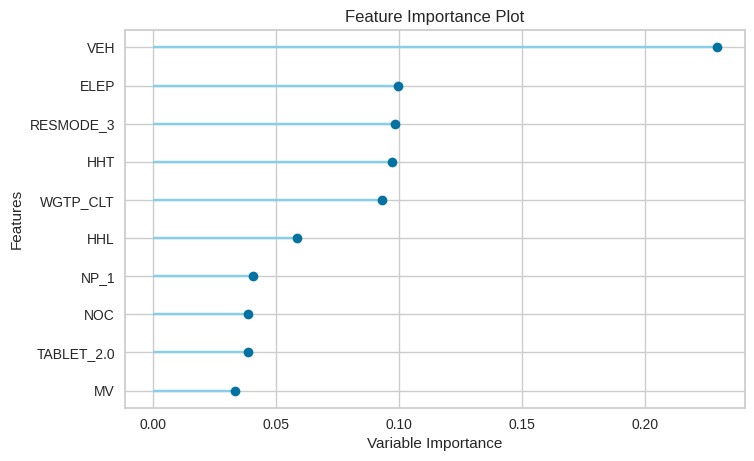

2022-04-27 23:03:24.966 INFO    logs: Visual Rendered Successfully
2022-04-27 23:03:25.050 INFO    logs: plot_model() succesfully completed......................................


In [18]:
plot_model(tuned_dt, plot = 'feature')

2022-04-27 23:03:25.056 INFO    logs: Initializing interpret_model()
2022-04-27 23:03:25.058 INFO    logs: interpret_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=27, splitter='best'), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
2022-04-27 23:03:25.059 INFO    logs: Checking exceptions
2022-04-27 23:03:25.149 INFO    logs: plot type: summary
2022-04-27 23:03:25.149 INFO    logs: Creating TreeExplainer
2022-04-27 23:03:25.150 INFO    logs: Compiling shap values


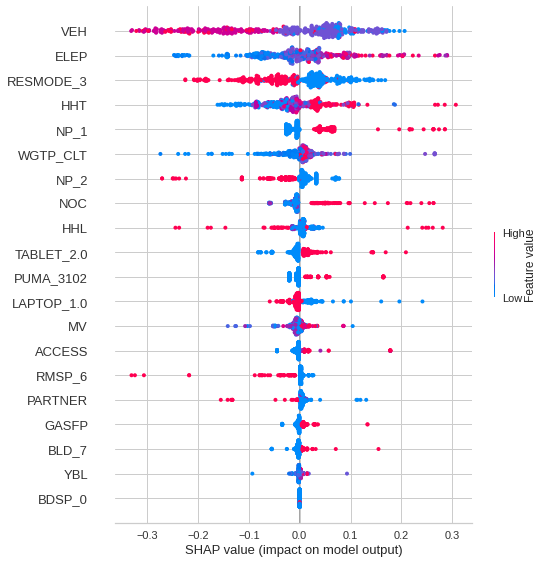

2022-04-27 23:03:25.606 INFO    logs: Visual Rendered Successfully
2022-04-27 23:03:25.607 INFO    logs: interpret_model() succesfully completed......................................


In [19]:
interpret_model(tuned_dt)

In [20]:
gbm = create_model('lightgbm')


2022-04-27 23:03:27.282 INFO    logs: create_model_container: 4
2022-04-27 23:03:27.283 INFO    logs: master_model_container: 4
2022-04-27 23:03:27.283 INFO    logs: display_container: 5
2022-04-27 23:03:27.283 INFO    logs: LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=27, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
2022-04-27 23:03:27.284 INFO    logs: create_model() succesfully completed......................................


In [21]:
gbm_tuned = tune_model(gbm)

2022-04-27 23:03:30.580 INFO    logs: create_model_container: 5
2022-04-27 23:03:30.581 INFO    logs: master_model_container: 5
2022-04-27 23:03:30.582 INFO    logs: display_container: 6
2022-04-27 23:03:30.583 INFO    logs: LGBMClassifier(bagging_fraction=0.6, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0,
               n_estimators=300, n_jobs=-1, num_leaves=4, objective=None,
               random_state=27, reg_alpha=0.01, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
2022-04-27 23:03:30.584 INFO    logs: tune_model() succesfully completed......................................


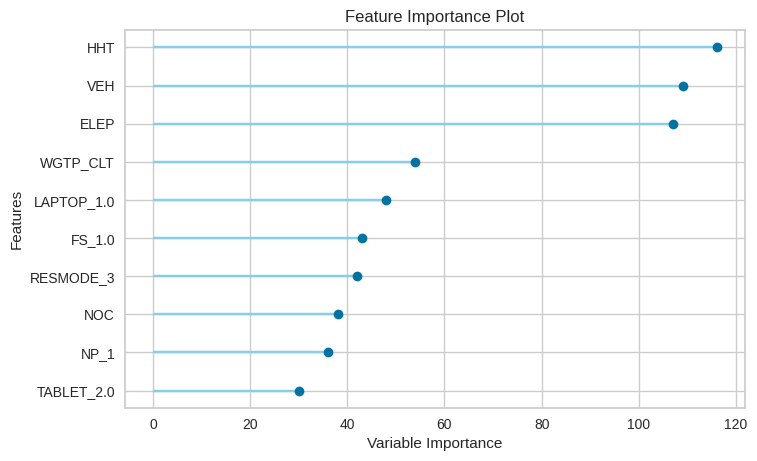

2022-04-27 23:03:30.881 INFO    logs: Visual Rendered Successfully
2022-04-27 23:03:30.966 INFO    logs: plot_model() succesfully completed......................................


In [22]:
plot_model(gbm_tuned, plot='feature')

2022-04-27 23:03:30.972 INFO    logs: Initializing interpret_model()
2022-04-27 23:03:30.973 INFO    logs: interpret_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0,
               n_estimators=300, n_jobs=-1, num_leaves=4, objective=None,
               random_state=27, reg_alpha=0.01, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
2022-04-27 23:03:30.974 INFO    logs: Checking exceptions
2022-04-27 23:03:30.974 INFO    logs: plot type: summary
2022-04-27 23:03:30.975 INFO    logs: Creating TreeExplainer
2022-04-27 23:03:31.009 INFO  

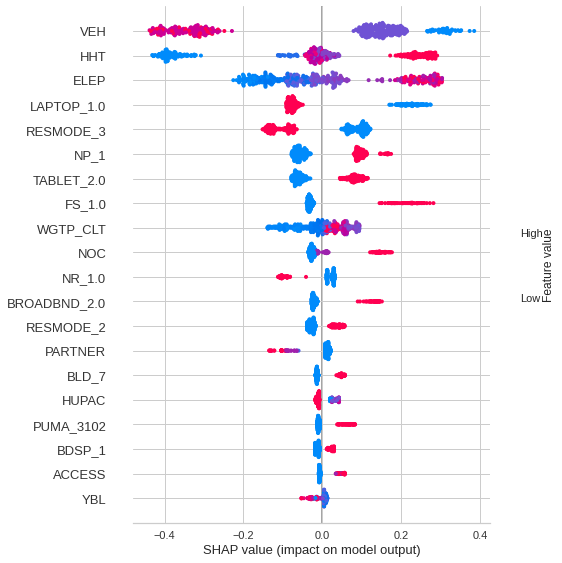

2022-04-27 23:03:31.497 INFO    logs: Visual Rendered Successfully
2022-04-27 23:03:31.498 INFO    logs: interpret_model() succesfully completed......................................


In [23]:
interpret_model(gbm_tuned)

In [24]:
#PUMA Code 3102 was highlighted, this is the lowest income region in Charlotte
PUMA_CODES[3102]

'Charlotte City (Northwest)'

In [25]:
best = compare_models()

2022-04-27 23:03:51.754 INFO    logs: create_model_container: 19
2022-04-27 23:03:51.755 INFO    logs: master_model_container: 19
2022-04-27 23:03:51.755 INFO    logs: display_container: 7
2022-04-27 23:03:51.756 INFO    logs: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=27, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
2022-04-27 23:03:51.756 INFO    logs: compare_models() succesfully completed..

In [26]:
svm = create_model('svm')

2022-04-27 23:03:52.358 INFO    logs: create_model_container: 20
2022-04-27 23:03:52.359 INFO    logs: master_model_container: 20
2022-04-27 23:03:52.359 INFO    logs: display_container: 8
2022-04-27 23:03:52.360 INFO    logs: SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=27, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
2022-04-27 23:03:52.360 INFO    logs: create_model() succesfully completed......................................


In [27]:
tuned_svm = tune_model(svm)

2022-04-27 23:03:53.902 INFO    logs: create_model_container: 21
2022-04-27 23:03:53.902 INFO    logs: master_model_container: 21
2022-04-27 23:03:53.903 INFO    logs: display_container: 9
2022-04-27 23:03:53.904 INFO    logs: SGDClassifier(alpha=0.2, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.5, fit_intercept=True, l1_ratio=0.4900000001,
              learning_rate='invscaling', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=27, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)
2022-04-27 23:03:53.904 INFO    logs: tune_model() succesfully completed......................................


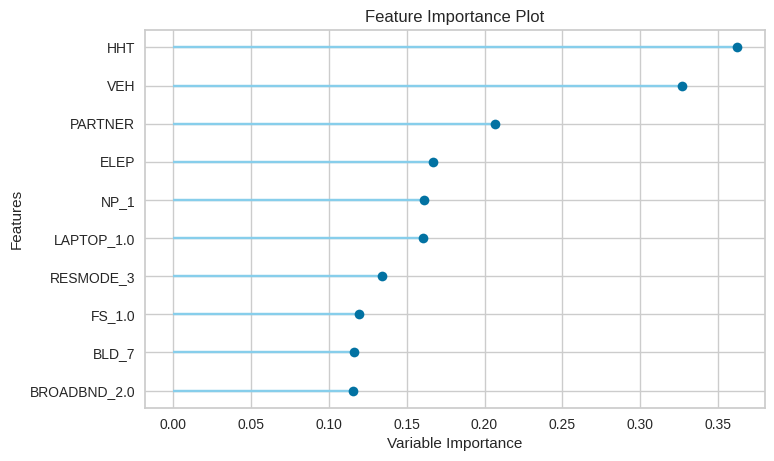

2022-04-27 23:03:54.122 INFO    logs: Visual Rendered Successfully
2022-04-27 23:03:54.196 INFO    logs: plot_model() succesfully completed......................................


In [28]:
plot_model(tuned_svm, plot = 'feature')

### Blending models

In [29]:
top3 = compare_models(n_select = 3)

2022-04-27 23:04:16.207 INFO    logs: create_model_container: 35
2022-04-27 23:04:16.207 INFO    logs: master_model_container: 35
2022-04-27 23:04:16.208 INFO    logs: display_container: 10
2022-04-27 23:04:16.209 INFO    logs: [GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=27, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True

In [30]:
blend_soft = blend_models(estimator_list = top3)

2022-04-27 23:04:20.497 INFO    logs: create_model_container: 36
2022-04-27 23:04:20.498 INFO    logs: master_model_container: 36
2022-04-27 23:04:20.498 INFO    logs: display_container: 11
2022-04-27 23:04:20.502 INFO    logs: VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                      

### Recap
The most important features according across models
- TEN
- NP
- HHT
- LNGI
- ELEP
- VEH
- WGTP_CLT


In [31]:
df_feat_select = df[['TEN', 'NP', 'HHT', 'LNGI', 'ELEP', 'VEH', 'WGTP_CLT', 'COST_BURDALL']]

In [32]:
df_feat_select

TEN  NP  HHT  LNGI   ELEP  VEH  WGTP_CLT  COST_BURDALL
0     3.0   5  3.0   1.0  100.0  1.0    200.33           1.0
1     3.0   1  4.0   1.0  120.0  1.0    111.87           0.0
2     3.0   2  1.0   1.0  170.0  2.0     90.00           0.0
3     3.0   4  1.0   1.0   80.0  2.0     61.87           0.0
4     3.0   1  4.0   1.0   30.0  1.0     95.00           0.0
...   ...  ..  ...   ...    ...  ...       ...           ...
1537  3.0   2  1.0   1.0  170.0  3.0     69.02           0.0
1538  3.0   4  1.0   1.0   90.0  1.0     56.28           0.0
1539  3.0   2  5.0   1.0   80.0  2.0     40.00           0.0
1540  3.0   1  6.0   1.0  110.0  1.0    159.00           0.0
1541  3.0   3  1.0   1.0  140.0  3.0     15.50           0.0

[1542 rows x 8 columns]

<AxesSubplot:>

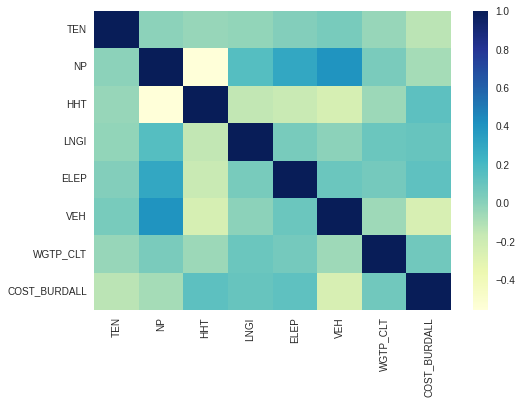

In [33]:
correlations = df_feat_select.corr()
sns.heatmap(correlations, cmap="YlGnBu", annot=False)

No clear correlations in the heatmap, sort of expected.

Take these categorical variables of interest and create PCA, then overlay COST_BURD

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components = 2)
pca_df = pd.DataFrame(pca.fit_transform(df_feat_select.drop(columns = ['COST_BURDALL'])))


In [36]:
pca_df[df_feat_select.columns] = df_feat_select
pca_df = pca_df.rename(columns = {0:'pca_0', 1:'pca_1'})

In [37]:
pca_df.head(1)

pca_0      pca_1  TEN  NP  HHT  LNGI   ELEP  VEH  WGTP_CLT  \
0  94.909129 -31.254691  3.0   5  3.0   1.0  100.0  1.0    200.33   

   COST_BURDALL  
0           1.0

In [38]:
alt.Chart(pca_df).mark_circle().encode(
    x = 'pca_0:Q',
    y = 'pca_1:Q',
    color = 'COST_BURDALL:N',
    tooltip = list(df_feat_select.columns)
).interactive()

alt.Chart(...)

In [40]:
df_feat_select.columns[:-1]

Index(['TEN', 'NP', 'HHT', 'LNGI', 'ELEP', 'VEH', 'WGTP_CLT'], dtype='object')

In [41]:
#source = datasets.load_iris()

alt.Chart(df_feat_select).transform_window(
    index='count()'
).transform_fold(
    list(df_feat_select.columns[:-1])
).mark_line().encode(
    x='key:N',
    y='value:Q',
    color='COST_BURDALL:N',
    detail='index:N',
    opacity=alt.value(0.5)
).properties(width=500)

alt.Chart(...)

need to scale...

In [42]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
df_feat_SCALED = pd.DataFrame(scaler.fit_transform(df_feat_select.drop(columns = ['COST_BURDALL'])), columns = list(df_feat_select.columns[:-1]))
df_feat_SCALED['COST_BURDALL'] = df_feat_select['COST_BURDALL']

In [45]:
df_feat_SCALED

TEN        NP       HHT      LNGI      ELEP       VEH  WGTP_CLT  \
0    -0.145575  2.234225 -0.366707 -0.271691 -0.217206 -0.461725  1.326143   
1    -0.145575 -0.873035  0.133702 -0.271691  0.098737 -0.461725  0.140868   
2    -0.145575 -0.096220 -1.367525 -0.271691  0.888596  0.742978 -0.152168   
3    -0.145575  1.457410 -1.367525 -0.271691 -0.533149  0.742978 -0.529082   
4    -0.145575 -0.873035  0.133702 -0.271691 -1.323008 -0.461725 -0.085173   
...        ...       ...       ...       ...       ...       ...       ...   
1537 -0.145575 -0.096220 -1.367525 -0.271691  0.888596  1.947682 -0.433279   
1538 -0.145575  1.457410 -1.367525 -0.271691 -0.375178 -0.461725 -0.603982   
1539 -0.145575 -0.096220  0.634111 -0.271691 -0.533149  0.742978 -0.822118   
1540 -0.145575 -0.873035  1.134520 -0.271691 -0.059234 -0.461725  0.772362   
1541 -0.145575  0.680595 -1.367525 -0.271691  0.414681  1.947682 -1.150393   

      COST_BURDALL  
0              1.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
...            ...  
1537           0.0  
1538           0.0  
1539           0.0  
1540           0.0  
1541           0.0  

[1542 rows x 8 columns]

In [46]:
alt.Chart(df_feat_SCALED).transform_window(
    index='count()'
).transform_fold(
    list(df_feat_SCALED.columns[:-1])
).mark_line().encode(
    x='key:N',
    y='value:Q',
    color='COST_BURDALL:N',
    detail='index:N',
    opacity=alt.value(0.5)
).properties(width=500).interactive()


alt.Chart(...)

In [48]:
df_feat_SCALED_CAT = df_feat_SCALED.drop(columns = ['ELEP', 'WGTP_CLT'])

In [55]:
#dropping noise from continuous features

alt.Chart(df_feat_SCALED_CAT).transform_window(
    index='count()'
).transform_fold(
    list(df_feat_SCALED_CAT.columns[:-1])
).mark_line().encode(
    x='key:N',
    y='value:Q',
    color='COST_BURDALL:N',
    detail='index:N',
    opacity=alt.value(0.5)
).properties(width=500).interactive()


alt.Chart(...)

This plot is essentially a (inverse?) fourier transformation on discrete data. It is quite literally extracting signal from the data
- https://www.youtube.com/watch?v=spUNpyF58BY 
- https://www.youtube.com/watch?v=h7apO7q16V0

Could apply different color encodings: possibly user select option 

In [54]:
#recreate transformation in Pandas
df_feat_SCALED_CAT

TEN        NP       HHT      LNGI       VEH  COST_BURDALL
0    -0.145575  2.234225 -0.366707 -0.271691 -0.461725           1.0
1    -0.145575 -0.873035  0.133702 -0.271691 -0.461725           0.0
2    -0.145575 -0.096220 -1.367525 -0.271691  0.742978           0.0
3    -0.145575  1.457410 -1.367525 -0.271691  0.742978           0.0
4    -0.145575 -0.873035  0.133702 -0.271691 -0.461725           0.0
...        ...       ...       ...       ...       ...           ...
1537 -0.145575 -0.096220 -1.367525 -0.271691  1.947682           0.0
1538 -0.145575  1.457410 -1.367525 -0.271691 -0.461725           0.0
1539 -0.145575 -0.096220  0.634111 -0.271691  0.742978           0.0
1540 -0.145575 -0.873035  1.134520 -0.271691 -0.461725           0.0
1541 -0.145575  0.680595 -1.367525 -0.271691  1.947682           0.0

[1542 rows x 6 columns]

Need to add tooltip

In [ ]:
get_values('TEN')

In [ ]:
df.TEN.value_counts()